In [1]:
# PRE-PROCESSING STEPS
#1. Import WV3 Imagery into ArcMap

#3. Use calculate statistics tool on raster.

#4. Open properties, check histograms for max and min values of all bands. Make sure none are 'naturally' 0.
     #4b. If NoData areas are not set, this will be reflected in a histogram spike at 0. Move to step 5. 
     #4b. If outliers exist (e.g. max/min anomlaies), use 'Generate Exclude Area' Tool. 
     #4c. Set exclusion to histogram at 0.01 and 99.9%

#5. Use 'Clip'tool to clip raster to itself, set "No Data" value as 0.0 (IMPORTANT!)
    #5b. check this by going to the layer properties, color RBG (0,0,0) and color 'NoData'. It should be classified as NoData    
    # repeat step 4

#6 open BCET code in jupyter notebooks using anaconda/python environment 'geo_env'. (where 'GDAL' and 'Rasterio' are loaded)

#7 Set bit depth dynamic range, WV3 MUL and PAN bit depth is 11-bit, SWR is 14-bit. If comparing set all as 14-bit (?)


# NOTES
# If convereting to 8 bit values (i.e. 0-255), change output dtype to uint8 in cell #4. 
# This updated BCET code will mask out values of 0.0 in the raster calulation. 
# This will allow for the proper minimums (l) to be extracted. 
# if l < b < h, then BCET fails for that band (Lui & Mason 2016, 2.6.1). 
      #Try to clip the tails of the histogram per step 4b, or change target range/mean. 



In [2]:
import numpy as np
import rasterio as rio
import numpy.ma as ma # Numpy mask

# Max and min target values for uint16 histograms
target_WV3_file = 'WV3_imagery/WV3_Orthorectified/MUL/WV3_MUL.TIF'
output_WV3_file = 'outputs/output_image_BCET.tif'


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 9198, 'height': 11413, 'count': 8, 'crs': CRS.from_epsg(32719), 'transform': Affine(1.2054794520547945, 0.0, 772580.3999999999,
       0.0, -1.2054674493998072, 6996529.199999999), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


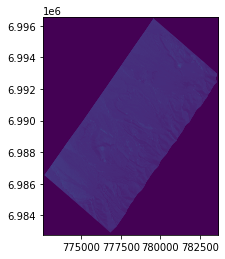

no data values (None, None, None, None, None, None, None, None)
no data None


In [3]:
# Load image into memory
wv3_src = rio.open(target_WV3_file, 'r')
wv3_profile = wv3_src.profile
print(wv3_profile) # print raster metadata

from rasterio.plot import show
show(wv3_src) # show image

print("no data values", wv3_src.nodatavals) # identify no data values in each band
print("no data", wv3_src.nodata)

Stats before --> after mask
Mean: 77.09418057560046 --> 176.25979001666911
Min: 0.0 --> 1.0
Max: 1374.0 --> 407.0
Min (normalized):
0.0
Max (normalized):
1.0


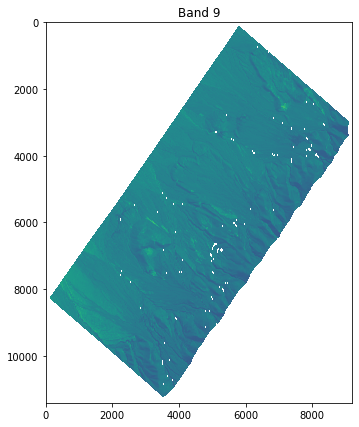

dynamic range  0 to 1
target mean  0.5
Band 1
min  0.0
max  1.0
mean  0.4316743596469663
BCET min 0.0
BCET max 1.0000000000000002
BCET mean 0.5000000000000034
BCET Pass
l, b, h -->  0.0 ,  2.2644089384310995 ,  1.0
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 137.5256087694217 --> 314.41938113876114
Min: 0.0 --> 8.0
Max: 1710.0 --> 894.0
Min (normalized):
0.0
Max (normalized):
0.9999999999999999


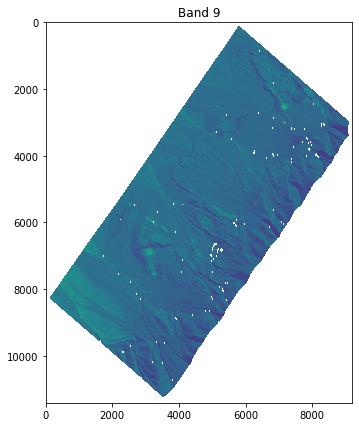

dynamic range  0 to 1
target mean  0.5
Band 2
min  0.0
max  0.9999999999999999
mean  0.3458458026396854
BCET min 0.0
BCET max 1.0
BCET mean 0.49999999999999784
BCET Pass
l, b, h -->  0.0 ,  1.213844259405223 ,  0.9999999999999999
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 187.54378329438853 --> 428.7706469753141
Min: 0.0 --> 1.0
Max: 2047.0 --> 1367.0
Min (normalized):
0.0
Max (normalized):
1.0


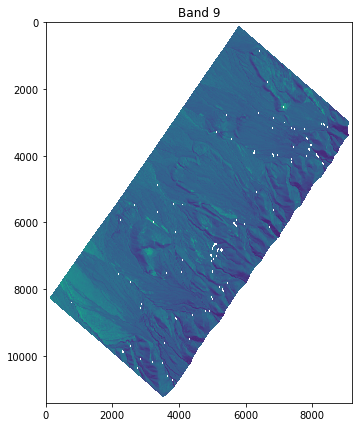

dynamic range  0 to 1
target mean  0.5
Band 3
min  0.0
max  1.0
mean  0.3131556712850025
BCET min 0.0
BCET max 1.0
BCET mean 0.5000000000000001
BCET Pass
l, b, h -->  0.0 ,  1.0547219401005627 ,  1.0
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 128.3946791792249 --> 293.54031789770715
Min: 0.0 --> 1.0
Max: 1677.0 --> 972.0
Min (normalized):
0.0
Max (normalized):
1.0


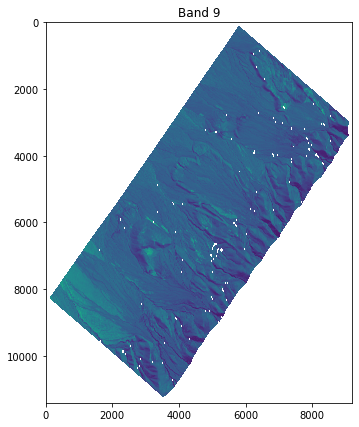

dynamic range  0 to 1
target mean  0.5
Band 4
min  0.0
max  1.0
mean  0.3012773613776607
BCET min 0.0
BCET max 1.0
BCET mean 0.4999999999999945
BCET Pass
l, b, h -->  0.0 ,  1.005558624145971 ,  1.0
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 127.45804450039587 --> 291.3986266090569
Min: 0.0 --> 1.0
Max: 1547.0 --> 985.0
Min (normalized):
0.0
Max (normalized):
1.0


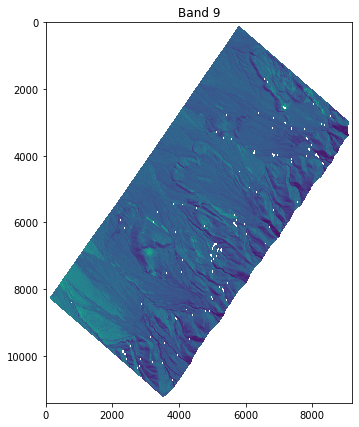

dynamic range  0 to 1
target mean  0.5
Band 5
min  0.0
max  1.0
mean  0.2951205554970091
BCET min 0.0
BCET max 1.0003022088300122
BCET mean 0.500000000000002
BCET Fail
l, b, h -->  0.0 ,  0.9829143807263908 ,  1.0
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 130.60999293043622 --> 298.60567391290283
Min: 0.0 --> 1.0
Max: 1800.0 --> 969.0
Min (normalized):
0.0
Max (normalized):
1.0


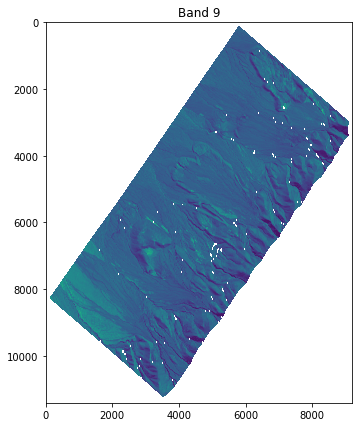

dynamic range  0 to 1
target mean  0.5
Band 6
min  0.0
max  1.0
mean  0.3074438780091981
BCET min 0.0
BCET max 1.0
BCET mean 0.49999999999999467
BCET Pass
l, b, h -->  0.0 ,  1.0273097272514102 ,  1.0
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 159.234406784114 --> 364.04829574461934
Min: 0.0 --> 1.0
Max: 2047.0 --> 1171.0
Min (normalized):
0.0
Max (normalized):
1.0


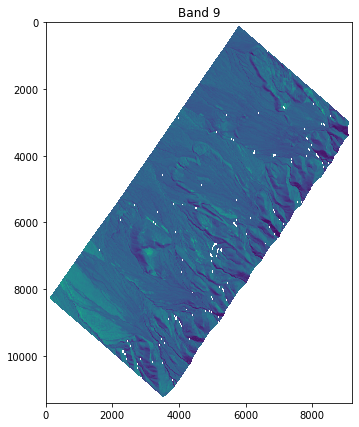

dynamic range  0 to 1
target mean  0.5
Band 7
min  0.0
max  1.0
mean  0.31029768867061547
BCET min 0.0
BCET max 1.0
BCET mean 0.49999999999999917
BCET Pass
l, b, h -->  0.0 ,  1.0381131230886083 ,  1.0
------------------------------
(11413, 9198)
Stats before --> after mask
Mean: 118.72747950894357 --> 271.4401300727261
Min: 0.0 --> 1.0
Max: 1313.0 --> 863.0
Min (normalized):
0.0
Max (normalized):
1.0


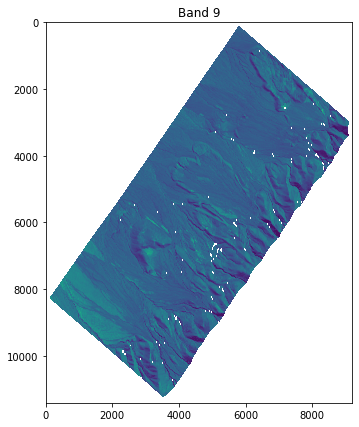

dynamic range  0 to 1
target mean  0.5
Band 8
min  0.0
max  1.0
mean  0.31373564973634155
BCET min 0.0
BCET max 0.9999999999999999
BCET mean 0.5000000000000031
BCET Pass
l, b, h -->  0.0 ,  1.0515527981066037 ,  1.0
------------------------------
(11413, 9198)
processing complete.


In [5]:
# Create new geotiff with BCET-ed layers
# if converting to 8-bit, use next line and update final line form uint16 to uint8.

import os
from sklearn import preprocessing
import matplotlib.pyplot as plt

count = wv3_profile['count'] # How many bands are in our image?
# Update metadata with chosen nodata value
wv3_profile.update({'nodata':0, 'dtype':np.uint16, 'count':count})

if os.path.exists(output_WV3_file):
    os.remove(output_WV3_file)
    
nodata = 0.0

with rio.open(output_WV3_file, 'w', **wv3_profile) as wv3_bcet:
    
    # Loop through each bands
    for layer_n in range(0,count):
 
        # Read band
        dat = wv3_src.read(layer_n+1).astype(np.float64)
        
        ### ADD NODATA MASK ###
        nodata_array = np.full(dat.shape, nodata) # A dummy array that just contains nodata values
        mask = np.equal(dat, nodata_array) # A bitwise mask of what parts of our original data match nodata
        
        # Remove large value outliers (requires manual QC!)
        max_pctile= np.percentile(dat,99.999)
        mask[dat>max_pctile] = 1
        
        # Set mask
        dat_masked = ma.array(dat, mask=mask) # Mask out nodata values so our BCET algorithm ignores them

        print('Stats before --> after mask')
        mean_orig = np.mean(dat)
        mean_mask = np.mean(dat_masked)
        print(f'Mean: {str(mean_orig)} --> {mean_mask}')
        min_orig = np.min(dat)
        min_mask = np.min(dat_masked)
        print(f'Min: {str(min_orig)} --> {min_mask}')
        max_orig = np.max(dat)
        max_mask = np.max(dat_masked)
        print(f'Max: {str(max_orig)} --> {max_mask}')
        
        # Shift the left minimum value to the current minimum, so the smallest value is now shifted to zero
        dat_masked_new = dat_masked-np.min(dat_masked) 
        
        # Normalize between 0 and 1
        dat_masked_new *= 1/dat_masked_new.max()
        print('Min (normalized):')
        print(np.min(dat_masked_new))
        print('Max (normalized):')
        print(np.max(dat_masked_new))      
        
        # Preview image 
        fig, axhist_prev = plt.subplots(1, 1, figsize=(7,7))
        plt.imshow(dat_masked_new)
        axhist_prev.set_title(f"Band {str(count+1)}")
        plt.show()
        
        
        # Convert any values greater than 1 to NaN
        dat_masked_new[dat_masked_new>1] = np.nan
              
        
        ### BCET ###
        
        L = 0 # desired output minimum
        H = 1  # desired output maximum, set to max bit-depth range
        E = H/2 # desired output mean
        

        print('dynamic range ', L, 'to', H) # prints the desired dynamic range of the output image
        print('target mean ', E) # prints the desired mean of the output image, 'E'
        

        ### BCET ###
    
        s = np.nanmean(np.power(dat_masked_new,2)) # mean squared
        e = np.nanmean(dat_masked_new)
        l = np.nanmin(dat_masked_new)
        h = np.nanmax(dat_masked_new)

        # Find b
        b_nom = ((h**2)*(E-L))-(s*(H-L))+((l**2)*(H-E))
        b_den = 2*((h*(E-L))-(e*(H-L))+(l*(H-E)))

        b = b_nom/b_den

        # Find a
        a1 = H-L
        a2 = h-l
        a3 = h+l-(2*b)

        a = a1/(a2*a3)

        # Find c
        c = L-(a*(l-b)**2)

        # Process raster
        bcet_raster = a*((dat_masked_new - b)**2) + c
        
        
        ### PRINT STATISTICS OF ORIGINAL AND BCET ###
        
        # identify statistics after the bcet algorithm is applied
        bcet_min = np.nanmin(bcet_raster)
        bcet_max = np.nanmax(bcet_raster)
        bcet_mean = np.nanmean(bcet_raster)
        
        print('Band', layer_n+1) # band/layer number
        print('min ', l) # min of target file layer
        print('max ', h) # max of target file layer
        print('mean ', e) # mean of target file layer
        print('BCET min', bcet_min) # min file layer after bcet
        print('BCET max', bcet_max) # max file layer after bce
        print('BCET mean', bcet_mean) # mean file layer after bce
        
        # BCET malfunction test as in Lui & Mason (2016) Section 2.6.1. Where l<b<h BCET malfunctions. 
        if (l < b) & (b < h):
            print('\033[91m'+ 'BCET Fail' + '\033[0;0m') # print in red
        else:
            print('\033[92m' + 'BCET Pass' + '\033[0;0m') # print in green
        
        print("l, b, h --> ", l,", ", b,", ",h)
        print('------------------------------')
        print(bcet_raster.shape)
        # Write layer to output file
        bcet_raster = (bcet_raster*65536).astype(np.uint16)
        wv3_bcet.write(bcet_raster, layer_n+1)

print("processing complete.")

In [ ]:
# Plot BCET band histograms/output file
from rasterio.plot import show_hist
import matplotlib.pyplot as plt

with rio.open(output_WV3_file) as src:
    fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
    show(src, ax=axrgb)
    show_hist(src, bins=50, histtype='stepfilled',
              lw=0.0, stacked=False, alpha=0.3, ax=axhist)
    plt.legend()
    plt.show()

# print raster metadata
final = rio.open(output_WV3_file, 'r')
final_profile = final.profile
print(final_profile)

In [ ]:
# plot original data/ target file
with rio.open(target_WV3_file) as src:
    fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
    show(src, ax=axrgb)
    show_hist(src, bins=50, histtype='stepfilled',
              lw=0.0, stacked=False, alpha=0.3, ax=axhist)
    plt.show()
    
print(wv3_profile)

In [ ]:
# load, read and print final raster data to check
# Open the recently creayed BCET image file
final = rio.open(output_WV3_file, 'r')
final_profile = final.profile
print(final_profile)

# Print targeted statistics used in the BCET. Ideally the BCET image stats should match the targeted stats. 
print('------------------------------')
print('Target Min = ', L)
print('target Max ', H)
print('target mean = ', E)
print('------------------------------')

# identify actual statistics of the new BCET image file
     # should we apply the same data mask to this check? 
     # **Mean values are DIFFERENT from those identified in the BCET for loop...???**

for layer_n in range(0,wv3_profile['count']):

        # Read band
        dat = final.read(layer_n+1)
        
        e = np.mean(dat)
        l = np.min(dat)
        h = np.max(dat)
        print('Band', layer_n+1)
        print('min ', l)
        print('max ', h)
        print('mean ', e)
        print('------------------------------')

